# **Red Wine Quality Dataset**

 **Importing Important Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

**Loading the wine dataset into a dataframe**

In [2]:
df = pd.read_csv('winequality-red.csv',delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

**Checking for some basic info**

In [97]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [99]:
df['quality'].value_counts().sort_values(ascending=False).to_frame()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


Since there is 6 values of  quality to make classifying simpler and get better results with our models i will reduce it to 3 categories 0,1 and 2 with the following function:

In [4]:
def new_quality_rating(rating):
    if (rating == 3 or rating == 4):
        return 0
    elif (rating == 5 or rating == 6):
        return 1
    else:
        return 2  

In [5]:
df['new_quality'] = df['quality'].apply(new_quality_rating)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
df.drop(columns=['quality'],axis=1,inplace=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


There are no null values and all the feature are continuous.

**Splitting the data into train and test**

In [7]:
def print_score_details(clf, x_train, y_train, x_test, y_test):
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n")        
        print("Accuracy Score:",accuracy_score(y_test, pred),"\n")
        print("Classification Report:\n",clf_report,"\n")
        print("Confusion Matrix:\n",confusion_matrix(y_test, pred),"\n")

In [8]:
x= df.drop(columns=['new_quality'],axis=1)
y = df['new_quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=24)


# **Decision Tree**

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=24)
tree_clf.fit(x_train, y_train)
print_score_details(tree_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.83125 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.250000    0.901887   0.531915   0.83125    0.561267   
recall      0.181818    0.905303   0.555556   0.83125    0.547559   
f1-score    0.210526    0.903592   0.543478   0.83125    0.552532   
support    11.000000  264.000000  45.000000   0.83125  320.000000   

           weighted avg  
precision      0.827451  
recall         0.831250  
f1-score       0.829127  
support      320.000000   

Confusion Matrix:
 [[  2   6   3]
 [  6 239  19]
 [  0  20  25]] 



**Hyperparameter Tuning of the Decision Tree**

In [43]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion":("gini","entropy"), 
    "splitter":("best", "random"), 
    "min_samples_split":[2, 3, 4,20]
}
tree_cv = RandomizedSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    cv=5,

)

tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print("Best paramters: ",best_params,"\n")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score_details(tree_clf, x_train, y_train, x_test, y_test)
#It gives different accuracy on different executions.

Best paramters:  {'splitter': 'best', 'min_samples_split': 2, 'criterion': 'gini'} 

Test Result:

Accuracy Score: 0.834375 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.222222    0.898876   0.568182  0.834375    0.563093   
recall      0.181818    0.909091   0.555556  0.834375    0.548822   
f1-score    0.200000    0.903955   0.561798  0.834375    0.555251   
support    11.000000  264.000000  45.000000  0.834375  320.000000   

           weighted avg  
precision      0.829112  
recall         0.834375  
f1-score       0.831641  
support      320.000000   

Confusion Matrix:
 [[  2   7   2]
 [  7 240  17]
 [  0  20  25]] 



**I'll try GridSearchCV and see if it returns different parameters**

In [136]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini","entropy"), 
    "splitter":("best", "random"), 
    "min_samples_split":[2, 4, 10] 
}


tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    cv=5
) 

tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print("Best paramters: ",best_params,"\n")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score_details(tree_clf, x_train, y_train, x_test, y_test)



Best paramters:  {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'} 

Test Result:

Accuracy Score: 0.83125 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.250000    0.911197   0.551020   0.83125    0.570739   
recall      0.272727    0.893939   0.600000   0.83125    0.588889   
f1-score    0.260870    0.902486   0.574468   0.83125    0.579274   
support    11.000000  264.000000  45.000000   0.83125  320.000000   

           weighted avg  
precision      0.837818  
recall         0.831250  
f1-score       0.834303  
support      320.000000   

Confusion Matrix:
 [[  3   6   2]
 [  8 236  20]
 [  1  17  27]] 



**An interesting thing that I noticed here is that when i limited the maximum depth and minimum samples leaf in the grid search the accuracy was much lesser than when i didn't in the default without tuning. When i removed the maximum depth and minimum samples leaf it improved the accuracy. I am limitting the complexity if im mentioning smaller values for these  hyperparameters but if i give a higher range it will take a lot more time to get the results using the GridSearchCV method so i removed them from my model.Although this can lead to overfitting so ill see how it is performing on the train data.**

In [137]:
pred1 = tree_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred1, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred1),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred1),"\n")

Train Result:

Accuracy Score: 1.0 

Classification Report:
               0       1      2  accuracy  macro avg  weighted avg
precision   1.0     1.0    1.0       1.0        1.0           1.0
recall      1.0     1.0    1.0       1.0        1.0           1.0
f1-score    1.0     1.0    1.0       1.0        1.0           1.0
support    52.0  1055.0  172.0       1.0     1279.0        1279.0 

Confusion Matrix:
 [[  52    0    0]
 [   0 1055    0]
 [   0    0  172]] 



With minimum samples split as 2 it is giving 100 percent accuracy for trained data which means the model is overfit and has a high variance so i'll increase the value of the minimum samples split to counter it. 

In [144]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini","entropy"), 
    "splitter":("best", "random"), 
    "min_samples_split":[25,30] 
}


tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    cv=5
) 

tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print("Best paramters: ",best_params,"\n")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score_details(tree_clf, x_train, y_train, x_test, y_test)

Best paramters:  {'criterion': 'gini', 'min_samples_split': 25, 'splitter': 'best'} 

Test Result:

Accuracy Score: 0.84375 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.250000    0.897436   0.589744   0.84375    0.579060   
recall      0.181818    0.928030   0.511111   0.84375    0.540320   
f1-score    0.210526    0.912477   0.547619   0.84375    0.556874   
support    11.000000  264.000000  45.000000   0.84375  320.000000   

           weighted avg  
precision      0.831911  
recall         0.843750  
f1-score       0.837039  
support      320.000000   

Confusion Matrix:
 [[  2   7   2]
 [  5 245  14]
 [  1  21  23]] 



In [145]:
pred1 = tree_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred1, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred1),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred1),"\n")

Train Result:

Accuracy Score: 0.910086004691165 

Classification Report:
                    0            1           2  accuracy    macro avg  \
precision   0.771429     0.936229    0.765432  0.910086     0.824363   
recall      0.519231     0.960190    0.720930  0.910086     0.733450   
f1-score    0.620690     0.948058    0.742515  0.910086     0.770421   
support    52.000000  1055.000000  172.000000  0.910086  1279.000000   

           weighted avg  
precision      0.906560  
recall         0.910086  
f1-score       0.907107  
support     1279.000000   

Confusion Matrix:
 [[  27   23    2]
 [   6 1013   36]
 [   2   46  124]] 



**Although the accuracy went down this means there will be lower variance in our data. I kept increasing the minimum sample split value and observed that the accuracy on the test data actually went up although the accuracy on the training data reduced. This gives a more balanced model and i adjusted the valued until the accuracy scores were comparable.**

# **Random Forest**

In [158]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300)

In [162]:
print_score_details(rf_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.865625 

Classification Report:
               0           1          2  accuracy   macro avg  weighted avg
precision   0.0    0.879725   0.724138  0.865625    0.534621      0.827605
recall      0.0    0.969697   0.466667  0.865625    0.478788      0.865625
f1-score    0.0    0.922523   0.567568  0.865625    0.496697      0.840895
support    11.0  264.000000  45.000000  0.865625  320.000000    320.000000 

Confusion Matrix:
 [[  0  11   0]
 [  0 256   8]
 [  0  24  21]] 



**Hyperparameter Tuning with RandomizedSearchCV**

In [167]:
max_features = [5,7]
max_depth = [10,15,20,40]
min_samples_split = [10,30,40]
min_samples_leaf = [2, 10]
bootstrap = [True, False]

random_grid = {
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring="f1",
    param_distributions=random_grid, 
    n_iter=20,
    cv=5, 
    
)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print("Best paramters: ",rf_best_params,"\n")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score_details(rf_clf, x_train, y_train, x_test, y_test)

Best paramters:  {'min_samples_split': 40, 'min_samples_leaf': 10, 'max_features': 5, 'max_depth': 15, 'bootstrap': True} 

Test Result:

Accuracy Score: 0.840625 

Classification Report:
               0           1          2  accuracy   macro avg  weighted avg
precision   0.0    0.851485   0.647059  0.840625    0.499515      0.793468
recall      0.0    0.977273   0.244444  0.840625    0.407239      0.840625
f1-score    0.0    0.910053   0.354839  0.840625    0.421631      0.800693
support    11.0  264.000000  45.000000  0.840625  320.000000    320.000000 

Confusion Matrix:
 [[  0  11   0]
 [  0 258   6]
 [  0  34  11]] 



In [168]:
pred2 = rf_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred2, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred2),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred2),"\n")

Train Result:

Accuracy Score: 0.870992963252541 

Classification Report:
               0            1           2  accuracy    macro avg  weighted avg
precision   0.0     0.875211    0.817204  0.870993     0.564138      0.831827
recall      0.0     0.983886    0.441860  0.870993     0.475249      0.870993
f1-score    0.0     0.926372    0.573585  0.870993     0.499986      0.841266
support    52.0  1055.000000  172.000000  0.870993  1279.000000   1279.000000 

Confusion Matrix:
 [[   0   52    0]
 [   0 1038   17]
 [   0   96   76]] 



*The accuracy of both the train and test data are comparable so the model is not overfit.*

# **Adaboost**

In [213]:
from sklearn.ensemble import AdaBoostClassifier

ab_clf = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, random_state=24)
ab_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100, random_state=24)

In [215]:
print_score_details(ab_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.825 

Classification Report:
               0          1     2  accuracy   macro avg  weighted avg
precision   0.0    0.82500   0.0     0.825    0.275000      0.680625
recall      0.0    1.00000   0.0     0.825    0.333333      0.825000
f1-score    0.0    0.90411   0.0     0.825    0.301370      0.745890
support    11.0  264.00000  45.0     0.825  320.000000    320.000000 

Confusion Matrix:
 [[  0  11   0]
 [  0 264   0]
 [  0  45   0]] 



In [216]:
ab_grid = {
    "learning_rate":[0.001,0.01, 0.1],
    "n_estimators":[100,500,700,1000]
}
ab_clf = AdaBoostClassifier(random_state=24)

ab_cv = GridSearchCV(
    ab_clf, 
    ab_grid,
    scoring="f1",
    cv=5
)

ab_cv.fit(x_train, y_train)
ab_best_params = ab_cv.best_params_
print("Best paramters: ",ab_best_params,"\n")



Best paramters:  {'learning_rate': 0.001, 'n_estimators': 100} 



In [217]:
ab_clf = AdaBoostClassifier(**ab_best_params)
ab_clf.fit(x_train, y_train)

print_score_details(ab_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.825 

Classification Report:
               0          1     2  accuracy   macro avg  weighted avg
precision   0.0    0.82500   0.0     0.825    0.275000      0.680625
recall      0.0    1.00000   0.0     0.825    0.333333      0.825000
f1-score    0.0    0.90411   0.0     0.825    0.301370      0.745890
support    11.0  264.00000  45.0     0.825  320.000000    320.000000 

Confusion Matrix:
 [[  0  11   0]
 [  0 264   0]
 [  0  45   0]] 



#  **XGBoost**

In [268]:
from xgboost import XGBRegressor
from xgboost.sklearn import XGBClassifier

xg_clf = XGBClassifier(n_estimators=500,learning_rate=0.05)
xg_clf.fit(x_train, y_train)
print(xg_clf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


In [269]:
print_score_details(xg_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.88125 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.200000    0.903571   0.800000   0.88125    0.634524   
recall      0.090909    0.958333   0.622222   0.88125    0.557155   
f1-score    0.125000    0.930147   0.700000   0.88125    0.585049   
support    11.000000  264.000000  45.000000   0.88125  320.000000   

           weighted avg  
precision      0.864821  
recall         0.881250  
f1-score       0.870106  
support      320.000000   

Confusion Matrix:
 [[  1  10   0]
 [  4 253   7]
 [  0  17  28]] 



In [270]:
pred3 = xg_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred3, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred3),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred3),"\n")

Train Result:

Accuracy Score: 1.0 

Classification Report:
               0       1      2  accuracy  macro avg  weighted avg
precision   1.0     1.0    1.0       1.0        1.0           1.0
recall      1.0     1.0    1.0       1.0        1.0           1.0
f1-score    1.0     1.0    1.0       1.0        1.0           1.0
support    52.0  1055.0  172.0       1.0     1279.0        1279.0 

Confusion Matrix:
 [[  52    0    0]
 [   0 1055    0]
 [   0    0  172]] 



In [271]:
results = cross_val_score(xg_clf, x, y, cv=10)
results

array([0.83125  , 0.8625   , 0.81875  , 0.79375  , 0.83125  , 0.8      ,
       0.80625  , 0.81875  , 0.8      , 0.8490566])

**Without any hyperparameter tuning the model is giving good accuracy on the test data but the accuracy score  on training data is 100 percent indicating that the model is overfit.**

**Hyperparameter Tuning of XGBoost**

In [259]:
xg_grid = {
    "learning_rate":[0.01, 0.05, 0.1],
    "n_estimators":[100,500,1000],
    "max_depth":[5,10]
}
xg_clf = XGBClassifier()

xg_cv = RandomizedSearchCV(
    xg_clf, 
    xg_grid,
    scoring="f1",
    n_iter=20,
    cv=5
)

xg_cv.fit(x_train, y_train)
xg_best_params = xg_cv.best_params_
print("Best paramters: ",xg_best_params,"\n")

Best paramters:  {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01} 



In [260]:
xg_clf = XGBClassifier(**xg_best_params)
xg_clf.fit(x_train, y_train)

print_score_details(xg_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.840625 

Classification Report:
                    0           1          2  accuracy   macro avg  \
precision   0.500000    0.858586   0.619048  0.840625    0.659211   
recall      0.090909    0.965909   0.288889  0.840625    0.448569   
f1-score    0.153846    0.909091   0.393939  0.840625    0.485625   
support    11.000000  264.000000  45.000000  0.840625  320.000000   

           weighted avg  
precision      0.812574  
recall         0.840625  
f1-score       0.810686  
support      320.000000   

Confusion Matrix:
 [[  1  10   0]
 [  1 255   8]
 [  0  32  13]] 



In [261]:
pred3 = xg_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred3, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred3),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred3),"\n")

Train Result:

Accuracy Score: 0.9132134480062549 

Classification Report:
                0            1           2  accuracy    macro avg  weighted avg
precision   1.00     0.911867    0.916667  0.913213     0.942845      0.916096
recall      0.25     0.990521    0.639535  0.913213     0.626685      0.913213
f1-score    0.40     0.949568    0.753425  0.913213     0.700998      0.900847
support    52.00  1055.000000  172.000000  0.913213  1279.000000   1279.000000 

Confusion Matrix:
 [[  13   39    0]
 [   0 1045   10]
 [   0   62  110]] 



**Although the accuracy has lowered of the testing data it is closer to the training accuracy indicating the model is not overfit and thus has lower variance.**

**Cross Validation**

In [262]:
#kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(xg_clf, x, y, cv=10)
results

array([0.80625  , 0.84375  , 0.825    , 0.8125   , 0.8625   , 0.8375   ,
       0.7625   , 0.85     , 0.81875  , 0.8427673])

**This model has by far given the best results**

# **K Nearest Neighbors**

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 8)

In [76]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [77]:
print_score_details(knn_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.80625 

Classification Report:
               0           1          2  accuracy   macro avg  weighted avg
precision   0.0    0.825806   0.200000   0.80625    0.341935      0.709415
recall      0.0    0.969697   0.044444   0.80625    0.338047      0.806250
f1-score    0.0    0.891986   0.072727   0.80625    0.321571      0.746116
support    11.0  264.000000  45.000000   0.80625  320.000000    320.000000 

Confusion Matrix:
 [[  0  11   0]
 [  0 256   8]
 [  0  43   2]] 



In [78]:
pred4 = knn_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred4, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred4),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred4),"\n")

Train Result:

Accuracy Score: 0.8522283033620016 

Classification Report:
               0            1           2  accuracy    macro avg  weighted avg
precision   0.0     0.859867    0.757143  0.852228     0.539003      0.811094
recall      0.0     0.982938    0.308140  0.852228     0.430359      0.852228
f1-score    0.0     0.917293    0.438017  0.852228     0.451770      0.815546
support    52.0  1055.000000  172.000000  0.852228  1279.000000   1279.000000 

Confusion Matrix:
 [[   0   51    1]
 [   2 1037   16]
 [   1  118   53]] 



**Cross Validation**

In [80]:
results = cross_val_score(knn_clf, x, y, cv=10)
results

array([0.8125    , 0.80625   , 0.81875   , 0.78125   , 0.85      ,
       0.80625   , 0.76875   , 0.80625   , 0.8375    , 0.82389937])

**Hyperparameter Tuning(GridSearchCV)**

In [81]:
from sklearn.model_selection import GridSearchCV
knn_grid = {
    "n_neighbors" : [5,7,8,9,11,13,15],
    "weights" : ['uniform','distance'],
    "metric" : ['minkowski','euclidean','manhattan']
}
knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(
    knn_clf, 
    knn_grid,
    scoring="f1",
    cv=5
)

knn_cv.fit(x_train, y_train)
knn_best_params = knn_cv.best_params_
print("Best paramters: ",knn_best_params,"\n")

Best paramters:  {'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'} 



In [82]:
knn_clf = KNeighborsClassifier(**knn_best_params)
knn_clf.fit(x_train, y_train)

print_score_details(knn_clf, x_train, y_train, x_test, y_test)

Test Result:

Accuracy Score: 0.79375 

Classification Report:
               0           1          2  accuracy   macro avg  weighted avg
precision   0.0    0.837838   0.250000   0.79375    0.362613      0.726372
recall      0.0    0.939394   0.133333   0.79375    0.357576      0.793750
f1-score    0.0    0.885714   0.173913   0.79375    0.353209      0.755171
support    11.0  264.000000  45.000000   0.79375  320.000000    320.000000 

Confusion Matrix:
 [[  0   9   2]
 [  0 248  16]
 [  0  39   6]] 



In [83]:
pred4 = knn_clf.predict(x_train)
clf_report = pd.DataFrame(classification_report(y_train, pred4, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train, pred4),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred4),"\n")

Train Result:

Accuracy Score: 0.8795934323690383 

Classification Report:
                    0            1           2  accuracy    macro avg  \
precision   0.538462     0.892268    0.791304  0.879593     0.740678   
recall      0.134615     0.973460    0.529070  0.879593     0.545715   
f1-score    0.215385     0.931097    0.634146  0.879593     0.593543   
support    52.000000  1055.000000  172.000000  0.879593  1279.000000   

           weighted avg  
precision      0.864305  
recall         0.879593  
f1-score       0.862065  
support     1279.000000   

Confusion Matrix:
 [[   7   45    0]
 [   4 1027   24]
 [   2   79   91]] 



**Cross Validation**

results = cross_val_score(knn_clf, x, y, cv=10)
results

**Principle Component Analysis(PCA)**

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
x_scaled=scaler.fit_transform(x)
#fit PCA model to data
pca_fit = pca.fit(x_scaled)

**Scree Plot to see variance distribution**

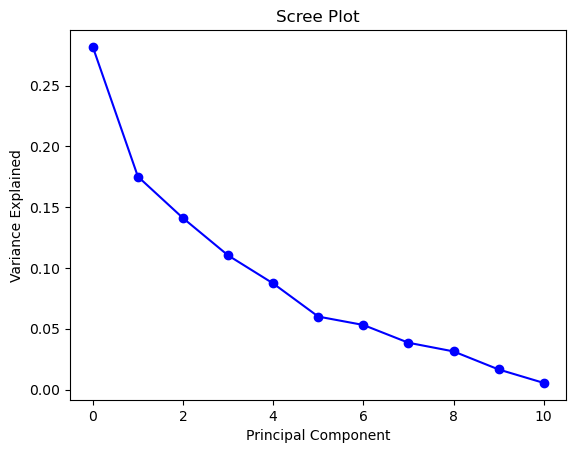

In [130]:

PC_values = np.arange(pca.n_components_) 
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [131]:
pca.explained_variance_ratio_

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

**Using features so that  75 percent variance is retained**

In [157]:
from sklearn.decomposition import PCA
pca = PCA(0.75)
x_pca = pca.fit_transform(x_scaled)
x_pca.shape

(1599, 5)

In [158]:
pca.n_components_

5

In [159]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=30)

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=8)

In [170]:
print_score_details(knn_clf, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

Test Result:

Accuracy Score: 0.83125 

Classification Report:
               0           1          2  accuracy   macro avg  weighted avg
precision   0.0    0.856655   0.576923   0.83125    0.477859      0.777108
recall      0.0    0.958015   0.357143   0.83125    0.438386      0.831250
f1-score    0.0    0.904505   0.441176   0.83125    0.448560      0.798467
support    16.0  262.000000  42.000000   0.83125  320.000000    320.000000 

Confusion Matrix:
 [[  0  15   1]
 [  1 251  10]
 [  0  27  15]] 



In [171]:
pred5 = knn_clf.predict(X_train_pca)
clf_report = pd.DataFrame(classification_report(y_train_pca, pred4, output_dict=True))
print("Train Result:\n")        
print("Accuracy Score:",accuracy_score(y_train_pca, pred5),"\n")
print("Classification Report:\n",clf_report,"\n")
print("Confusion Matrix:\n",confusion_matrix(y_train, pred5),"\n")

Train Result:

Accuracy Score: 0.8631743549648163 

Classification Report:
               0            1           2  accuracy    macro avg  weighted avg
precision   0.0     0.823632    0.086957  0.749023     0.303529      0.692569
recall      0.0     0.896878    0.057143  0.749023     0.318007      0.749023
f1-score    0.0     0.858696    0.068966  0.749023     0.309220      0.719085
support    47.0  1057.000000  175.000000  0.749023  1279.000000   1279.000000 

Confusion Matrix:
 [[   1   46    0]
 [   2 1034   21]
 [   0  106   69]] 



**It is observed that using PCA i could reduce the number of features used to build the model could be reduced to 5 from 11 and it increased model accuracy on Test data without overfitting as the train and test accuracy is comparable.**

**As a conclusion XGBoost worked the best with this dataset.**